<a href="https://colab.research.google.com/github/aadegokemuideen/dino/blob/master/image_classification_with_gemini_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

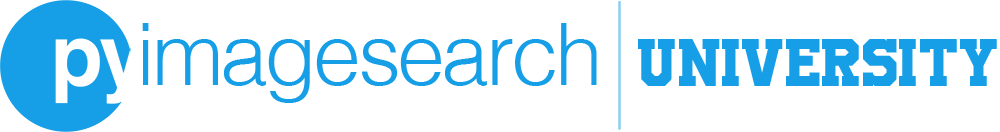

# Image Classification with Gemini Pro
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch University](https://pyimg.co/university)** Jupyter Notebooks!

This notebook is associated with the [Image Classification with Gemini Pro](https://pyimg.co/melcg) blog post published on 2024-02-19.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch University Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook.

Happy hacking!

*PyImageSearch Team*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2024 OptiReto, LLC and PyImageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch University at https://pyimg.co/university today.*

## Blog Post Code

## Setup and Imports

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import textwrap
import google.generativeai as genai
from IPython.display import Markdown

## Authentication

First save your secret key in the Google Colab after you have generated it from:

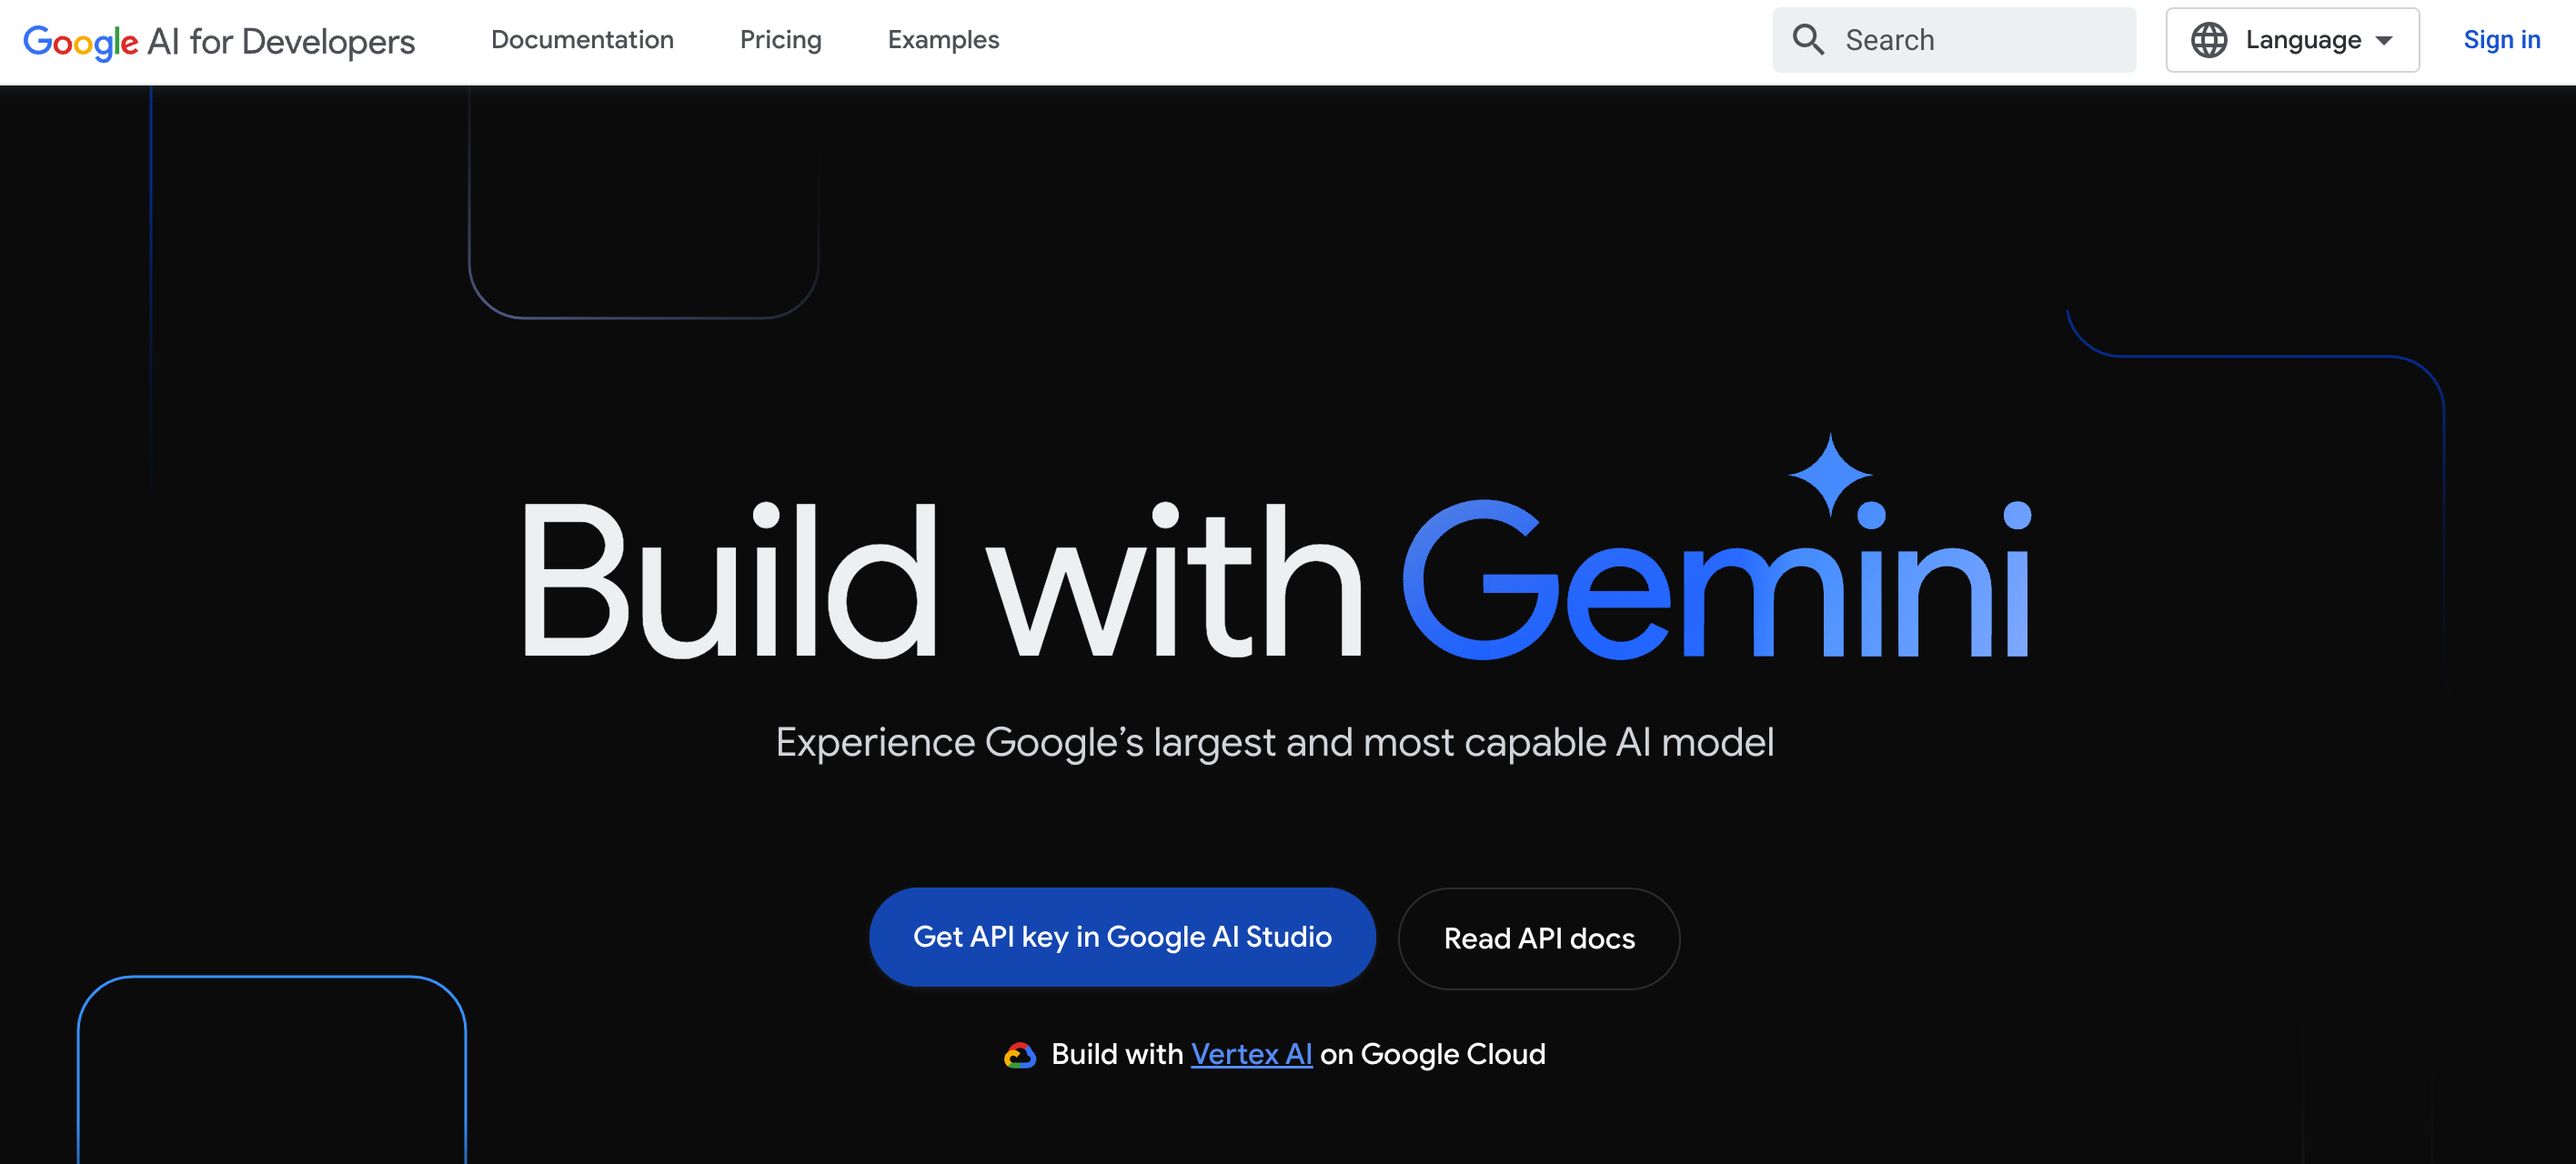

### Saving the Secret Key

Click on 'Secrets' on the left hand side panel in the Google Colab and add the API Key.

In [ ]:
# Used to securely store your API key
from google.colab import userdata
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get("GEMINI_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

### List of models

In [ ]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-pro
models/gemini-pro-vision


## Using Gemini Pro

In [ ]:
model = genai.GenerativeModel("gemini-pro")

## Using the model

In [ ]:
def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [ ]:
response = model.generate_content(
    "Write a image multiclass classification code in pytorch framework using a public dataset"
    " I would be training and testing the image classification code in Google colab",
    stream=True
)
response.resolve()

In [ ]:
to_markdown(response.text)

> ```python
> # Import Necessary Libraries
> import torch
> import torchvision
> import torch.nn as nn
> import torch.optim as optim
> from torchvision import transforms, datasets
> 
> # Load the Public Dataset
> train_data = datasets.ImageFolder(root='path/to/train', transform=transforms.ToTensor())
> test_data = datasets.ImageFolder(root='path/to/test', transform=transforms.ToTensor())
> 
> # Initialize the DataLoaders
> train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
> test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)
> 
> # Define the Convolutional Neural Network (CNN) Model
> class CNN(nn.Module):
>     def __init__(self):
>         super(CNN, self).__init__()
>         # Convolutional Layers
>         self.conv1 = nn.Conv2d(3, 6, 5)  # Input channels: 3 (RGB), Output channels: 6, Kernel size: 5x5
>         self.pool = nn.MaxPool2d(2, 2)    # Kernel size: 2x2, Stride: 2
>         self.conv2 = nn.Conv2d(6, 16, 5)  # Input channels: 6, Output channels: 16, Kernel size: 5x5
>         self.pool = nn.MaxPool2d(2, 2)    # Kernel size: 2x2, Stride: 2
> 
>         # Fully Connected Layers
>         self.fc1 = nn.Linear(16 * 5 * 5, 120)
>         self.fc2 = nn.Linear(120, 84)
>         self.fc3 = nn.Linear(84, 10)
> 
>     def forward(self, x):
>         # Pass the input through the convolutional layers
>         x = self.pool(F.relu(self.conv1(x)))
>         x = self.pool(F.relu(self.conv2(x)))
> 
>         # Flatten the feature maps
>         x = x.view(x.size(0), -1)
> 
>         # Pass the flattened feature maps through the fully connected layers
>         x = F.relu(self.fc1(x))
>         x = F.relu(self.fc2(x))
>         x = self.fc3(x)
>         return x
> 
> # Initialize the CNN Model and Specify the Loss Function and Optimizer
> model = CNN()
> criterion = nn.CrossEntropyLoss()
> optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
> 
> # Train the Model
> for epoch in range(20):  # Adjust the number of epochs as needed
>     running_loss = 0.0
>     for i, data in enumerate(train_loader, 0):
>         # Get the inputs; data is a list of [inputs, labels]
>         inputs, labels = data
> 
>         # Zero the parameter gradients
>         optimizer.zero_grad()
> 
>         # Forward pass
>         outputs = model(inputs)
> 
>         # Calculate the loss
>         loss = criterion(outputs, labels)
> 
>         # Backward pass
>         loss.backward()
> 
>         # Update the parameters
>         optimizer.step()
> 
>         # Print statistics
>         running_loss += loss.item()
>         if i % 2000 == 1999:    # Print every 2000 mini-batches
>             print('[%d, %5d] loss: %.3f' %
>                   (epoch + 1, i + 1, running_loss / 2000))
>             running_loss = 0.0
> 
> # Test the Model
> correct = 0
> total = 0
> with torch.no_grad():
>     for data in test_loader:
>         images, labels = data
>         outputs = model(images)
>         _, predicted = torch.max(outputs.data, 1)
>         total += labels.size(0)
>         correct += (predicted == labels).sum().item()
> 
> print('Accuracy of the network on the 10000 test images: %d %%' % (
>     100 * correct / total))
> 
> # Save the Trained Model
> torch.save(model.state_dict(), 'image_classifier.pt')
> ```

## Gemini Pro Generation

To successfully run the provided code and obtain the test results, a few corrections were made:

1. Integration of the CIFAR-10 dataset was implemented for accurate model training and testing.
2. The `torch.nn.functional` library was imported to ensure all necessary functions were available.
3. A print statement was added to periodically display the loss after each training epoch, aiding in monitoring the model's training progress.

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torch.nn.functional as F

# Define the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the public dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                     download=True, transform=torchvision.transforms.ToTensor())

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                    download=True, transform=torchvision.transforms.ToTensor())

# Create the data loader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = CNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # Get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / 2000))
        #     running_loss = 0.0
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Save the trained model
torch.save(model.state_dict(), 'trained_model.pt')

100%|██████████| 170498071/170498071 [00:05<00:00, 29302880.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Loss: 2.213340243262708
Epoch 2, Loss: 1.614285399999155
Epoch 3, Loss: 1.4277218132067824
Epoch 4, Loss: 1.3255487715496737
Epoch 5, Loss: 1.2489837502579555
Epoch 6, Loss: 1.1976356018534706
Epoch 7, Loss: 1.1457488671745486
Epoch 8, Loss: 1.097599425660375
Epoch 9, Loss: 1.0516416126352441
Epoch 10, Loss: 1.0136031122768627
Accuracy of the network on the 10000 test images: 57 %


## GPT3.5 Generation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check if a GPU is available, if not, use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define transformations for data augmentation and normalization
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training loop
for epoch in range(10):  # You can adjust the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

print("Training finished")

net.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

accuracy = accuracy_score(all_labels, all_predictions)
confusion = confusion_matrix(all_labels, all_predictions)
classification_rep = classification_report(all_labels, all_predictions, target_names=classes)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

100%|██████████| 170498071/170498071 [00:03<00:00, 43389823.48it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Loss: 1.656345052792288
Epoch 2, Loss: 1.2884532127081585
Epoch 3, Loss: 1.0894466095873157
Epoch 4, Loss: 0.9669426654458351
Epoch 5, Loss: 0.8824315952218097
Epoch 6, Loss: 0.8171949713583797
Epoch 7, Loss: 0.7658578648667811
Epoch 8, Loss: 0.7242285415644536
Epoch 9, Loss: 0.6837977789856894
Epoch 10, Loss: 0.6462546251618954
Training finished
Accuracy: 77.29%
Confusion Matrix:
[[796   9  51  27   9  19  13   5  41  30]
 [ 14 875   6  12   2   5   9   1  19  57]
 [ 46   2 653  52  60  77  80  21   3   6]
 [ 16   5  45 564  34 227  92   8   2   7]
 [ 13   1  50  54 726  43  69  41   3   0]
 [  8   2  20 131  31 754  29  22   1   2]
 [  4   1  28  43  19  30 873   0   2   0]
 [  6   0  33  32  40  90   9 786   0   4]
 [ 50  16  11  15   4  17   7   5 857  18]
 [ 31  51   5  11   4  12   9  11  21 845]]
Classification Report:
              precision    recall  f1-score   support

       pl

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Image Classification with Gemini Pro*](https://pyimg.co/melcg) published on 2024-02-19.

# Code License Agreement
```
Copyright (c) 2023 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from OptiReto, LLC and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```